In [425]:
import numpy as np 
import math 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

file = 'DATA/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat'
with open (file, "r") as myfile:
    full_data=myfile.readlines()
data=list(full_data[175][:-1])
print(data)

['4', '4', '3', '1', '2', '0', '0', '0', '5', '4', '3', '5', '0', '5', '4', '4', '3', '2', '3', '3', '3', '5', '5', '0', '5', '1', '0', '5', '0', '4', '5', '5', '1', '0', '2', '2', '0', '1', '3', '2', '2', '3', '1', '0', '0', '4', '5', '1', '0', '2', '0', '5', '1', '5', '4', '0', '1', '2', '2', '3', '3', '3', '2', '4', '4', '2', '0', '4', '3', '3', '3', '2', '3', '3', '2', '3', '3', '4', '0', '0', '5', '0', '0', '0', '5', '0', '0', '0', '1', '2', '0', '2', '1', '3', '2', '1', '0', '5', '3', '3', '1', '2', '3', '4', '2', '3', '3', '5', '3', '3', '4', '4', '3', '1', '5', '0', '0', '4', '4', '2', '1', '1', '0', '4', '0', '5', '3', '1', '0', '2', '1', '1', '5', '0', '1', '5', '0', '2', '1', '3', '1', '1', '0', '1', '5', '4', '4', '2', '0', '4', '0', '4', '4', '5', '4', '3', '1', '5', '0', '1', '2', '3', '5', '5', '5', '0', '2', '0', '4', '3', '3', '4', '4', '4', '5', '5', '3', '5', '4', '0', '0', '1', '3', '1', '0', '0', '5', '3', '5', '0', '4', '0', '4', '3', '5', '3', '5', '5', '4', '5',

In [426]:
cx, cy, cz = 0,0,0
#coordinate di ogni passo
fcx,fcy,fcz=[cx],[cy],[cz]
#coordinate di ogni spigolo
X,Y,Z=[cx],[cy],[cz]
temp=(0,0,0)
for i in range(0,len(data)):
    if data[i]=='0':
        cx+=1
    elif data[i]=='1':
        cy+=1
    elif data[i]=='2':
        cz+=1        
    elif data[i]=='3':
        cx-=1
    elif data[i]=='4':
        cy-=1
    elif data[i]=='5':
        cz-=1
        

    fcx.append(cx)
    fcy.append(cy)
    fcz.append(cz)
    if(i==len(data)-1):
        X.append(cx)
        Y.append(cy)
        Z.append(cz)
    try:
        if(i<len(data) and data[i]!=data[i+1]):
            X.append(cx)
            Y.append(cy)
            Z.append(cz)
    except:
        continue



minx,miny,minz=np.amin(fcx),np.amin(fcy),np.amin(fcz)
for i in range(0,len(fcx)):
    fcx[i]=fcx[i]+abs(minx)
    fcy[i]=fcy[i]+abs(miny)
    fcz[i]=fcz[i]+abs(minz)
minX,minY,minZ=np.amin(X),np.amin(Y),np.amin(Z)
for i in range(0,len(X)):
    X[i]=X[i]+abs(minX)
    Y[i]=Y[i]+abs(minY)
    Z[i]=Z[i]+abs(minZ)

In [427]:
if((abs(np.sign(X[1]-X[-1]))+abs(np.sign(Y[1]-Y[-1]))+abs(np.sign(Z[1]-Z[-1])))==1):
    X.pop(0)
    Y.pop(0)
    Z.pop(0)

if((abs(np.sign(X[-2]-X[0]))+abs(np.sign(Y[-2]-Y[0]))+abs(np.sign(Z[-2]-Z[0])))==1):
    X.pop(-1)
    Y.pop(-1)
    Z.pop(-1)


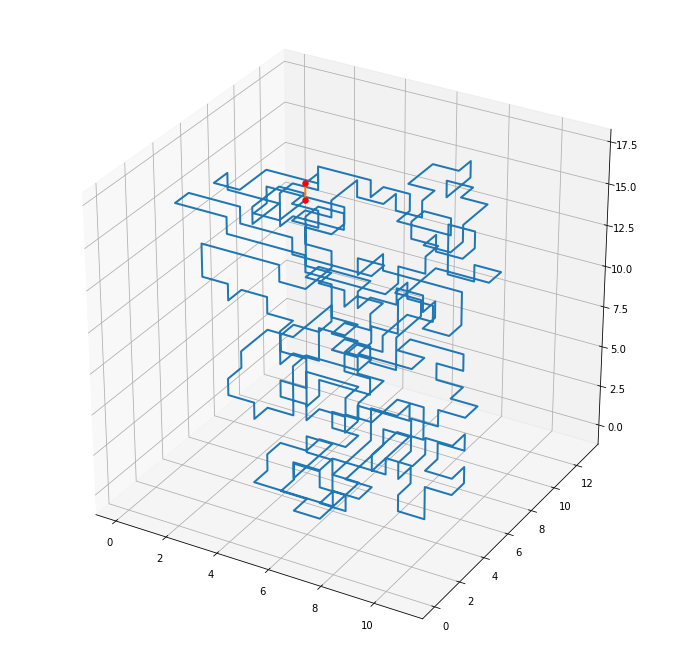

In [428]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(fcx, fcy, fcz, lw=2)
ax.scatter(fcx[0], fcy[0], fcz[0], lw=2, c='r')
ax.scatter(fcx[-1], fcy[-1], fcz[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([fcx[0],fcx[-1]], [fcy[0],fcy[-1]], [fcz[0],fcz[-1]], lw=2);

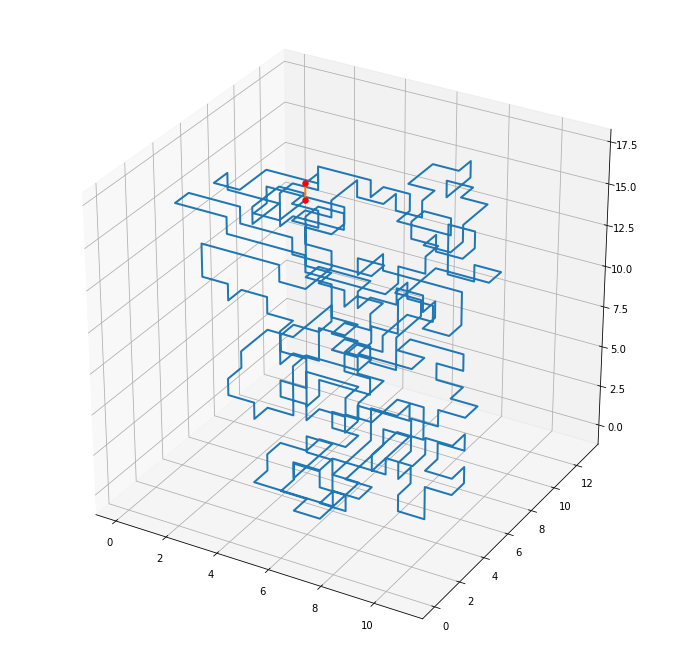

In [429]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(X, Y, Z, lw=2)
ax.scatter(X[0], Y[0], Z[0], lw=2, c='r')
ax.scatter(X[-1], Y[-1], Z[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([X[0], X[-1]], [Y[0], Y[-1]], [Z[0], Z[-1]], lw=2);

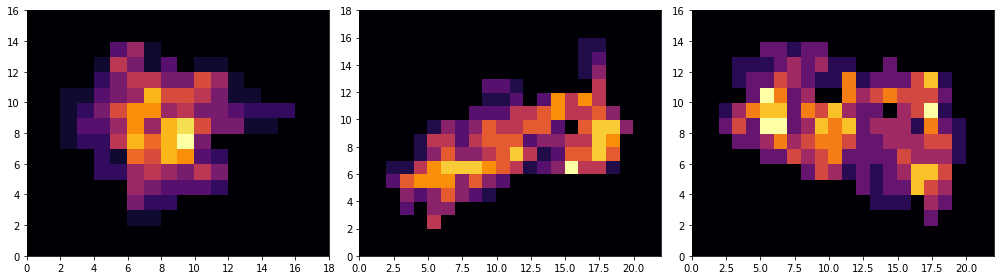

In [430]:
pic2dz=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcy)+5))
pic2dx=np.zeros(shape=(np.amax(fcy)+5,np.amax(fcz)+5))
pic2dy=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcz)+5))

for x,y,z in zip(fcx,fcy,fcz):
    pic2dz[x+2,y+2]+=1
    pic2dx[y+2,z+2]+=1
    pic2dy[x+2,z+2]+=1

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))

ax0.pcolor(pic2dz, cmap="inferno")
ax1.pcolor(pic2dx, cmap="inferno")
ax2.pcolor(pic2dy, cmap="inferno")
fig.tight_layout()
plt.show()

In [431]:
import math 
from math import sqrt, pow
n=len(X)
#matrice delle distanze relative
d=np.zeros(shape=(n, n))
#vettore degli elementi indipendenti
d_indep=np.empty(shape=(n, n))
           
def edist(x1,y1,z1,x2,y2,z2):
    return sqrt(pow((x1-x2),2) + pow((y1-y2),2) + pow((z1-z2),2))
           
for i in range(0,n):
    for j in range(0,n):
        tdist=edist(X[i],Y[i],Z[i],X[j],Y[j],Z[j])
        d[i,j]=tdist
        if (i-j)>0:
            d_indep[i,j]=(tdist)


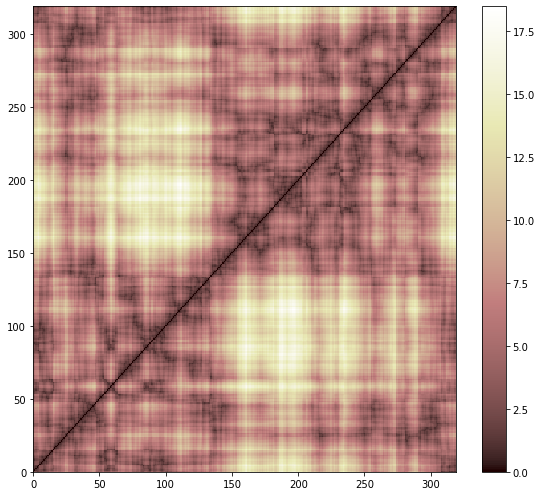

In [432]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(d, cmap="pink")
fig.colorbar(c, ax=ax, )
fig.tight_layout()
plt.show()

In [433]:
def dihedral(p1,p2,p3,p4):
    q1 = np.subtract(p2,p1) # b - a
    q2 = np.subtract(p3,p2) # c - b
    q3 = np.subtract(p4,p3) # d - c
    q1_x_q2 = np.cross(q1,q2)
    q2_x_q3 = np.cross(q2,q3)
    n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
    n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))
    u1 = n2
    u3 = q2/(np.sqrt(np.dot(q2,q2)))
    u2 = np.cross(u3,u1)
    cos_theta = np.dot(n1,u1)
    sin_theta = np.dot(n1,u2)
    theta = -math.atan2(sin_theta,cos_theta) 
    return theta

In [434]:
torsion_angles= []
segment_length=[]
for i in range(0,len(X)):
    
    if (i==len(X)-1):
        i1,i2,i3=0,1,2
    elif (i+1==len(X)-1):
        i1,i2,i3=i+1,0,1
    elif (i+2==len(X)-1):
        i1,i2,i3=i+1,i+2,0
    else:
        i1,i2,i3=i+1,i+2,i+3
    p1=[X[i],Y[i],Z[i]]
    p2=[X[i1],Y[i1],Z[i1]]
    p3=[X[i2],Y[i2],Z[i2]]
    p4=[X[i3],Y[i3],Z[i3]]
    segment_length.append(edist(X[i],Y[i],Z[i],X[i1],Y[i1],Z[i1]))
    torsion_angles.append(dihedral(p1,p2,p3,p4))
print("Possible angles: ", np.unique(torsion_angles))

normalized_torsion_angles=(torsion_angles-np.mean(torsion_angles, axis=0))/np.linalg.norm(torsion_angles) 
print(np.unique(normalized_torsion_angles))

Possible angles:  [-3.14159265 -1.57079633 -0.          1.57079633]
[-0.07004069 -0.02434952  0.02134164  0.06703281]


In [435]:
centr_angles = torsion_angles - np.mean(torsion_angles)
norms = np.linalg.norm(centr_angles, axis=0)
std_angles = centr_angles / norms

print("Standardized possible angles: ", np.unique(std_angles), "\nDevStd =", np.linalg.norm(std_angles), "\nMean =", np.mean(std_angles))

Standardized possible angles:  [-0.07576034 -0.02633795  0.02308444  0.07250683] 
DevStd = 1.0 
Mean = 0.0
